# **Project Name - Zomato Restaurant Clustering and Sentiment Analysis**

# **Project Type** - **Clustering and NLP**

# **Contribution** - **Individual**


# **1. Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

In [12]:

#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
     

In [13]:
meta_df_main=pd.read_csv('Restaurant names and Metadata.csv', encoding= 'unicode_escape')
review_df=pd.read_csv('Restaurant reviews.csv', encoding= 'unicode_escape')
     

In [14]:
# Making Copy of meta Data
meta_df = meta_df_main.copy()
     

In [15]:
# Top 5 rows of meta data
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [16]:
# Last 5 rows of meta data
meta_df.tail()
     

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

In [17]:
#   ----------------Attribute information--------------------------------
#Zomato Restaurant names and Metadata

#Name : Name of Restaurants

#Links : URL Links of Restaurants

#Cost : Per person estimated Cost of dining

#Collection : Tagging of Restaurants w.r.t. Zomato categories

#Cuisines : Cuisines served by Restaurants

#Timings : Restaurant Timings

In [18]:
#Zomato Restaurant names and Metadata

#Name : Name of Restaurants

#Links : URL Links of Restaurants

#Cost : Per person estimated Cost of dining

#Collection : Tagging of Restaurants w.r.t. Zomato categories

#Cuisines : Cuisines served by Restaurants

#Timings : Restaurant Timings

In [19]:
#Shape of review data
review_df.shape

(10000, 7)

In [20]:
#There are 10000 rows and 7 columns in review data

In [21]:
#  ---------------4. Data Cleaning and Pre-Processing
#1. Meta Data cleaning and pre-processing
# Info about meta data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [22]:
# Summary of meta Data
meta_df.describe()

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [23]:
#Checking for null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [24]:
#more than half of the rows are has Collections as null value
# Names of restaurants
meta_df['Name'].value_counts()

Name
Beyond Flavours                           1
Diners Pavilion                           1
Squeeze @ The Lime                        1
The Old Madras Baking Company             1
Royal Spicy Restaurant                    1
                                         ..
Marsala Food Company                      1
Pista House                               1
Pot Pourri                                1
Hunger Maggi Point                        1
Republic Of Noodles - Lemon Tree Hotel    1
Name: count, Length: 105, dtype: int64

In [25]:
# Checking duplicate rows in dataset
meta_df.duplicated(keep='last').sum()

0

In [26]:
#There are no duplicate records in the meta data

In [27]:
# Changing cost function's data type
meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

In [28]:
#2. Review Data cleaning and pre-processing
# Info about review data
review_df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [29]:
#Summary of Review Data
review_df.describe()

Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000

In [30]:
#Check for null values
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [31]:
# Unique values in 'Rating' column
review_df['Rating'].unique()
     

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [32]:
#We have some ratings as 'LIKE' so we need to convert that to numerical value
# Handling unwated values and changing string in float
review_df.loc[review_df['Rating'] == 'Like'] = np.nan
review_df['Rating']= review_df['Rating'].astype('float64')
     


In [33]:
#Mean of Ratings
print(review_df['Rating'].mean())
     

3.601044071880333


In [34]:
#Filling nan values with mean
review_df['Rating'].fillna(3.6, inplace=True)

In [35]:
#First 5 rows
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54       0.0  
1  3 Reviews , 2 Followers  5/25/2019 14:20       0.0  
2  2 Reviews , 3 Followers  5/24/2019 22:54       0.0  
3    1 Review , 1 Follower  5/24/2019 22:11       0.0  
4  3 Reviews , 2 Followers  5/24/2019 21:37       0.0

In [36]:
#The meta data consists of review data and followers data, we need to convert it into 2 columns

In [37]:
# split metadata column into 2 columns i.e. Reviews and followers and storing the count of reviews and followers respestively
review_df[['Reviews', 'Followers']] = review_df['Metadata'].str.split(',', expand=True)
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0], errors='coerce')
review_df['Followers'] = pd.to_numeric(review_df['Followers'].str.split(' ').str[1], errors='coerce')


In [38]:
# Dropping Metadata column
review_df = review_df.drop(['Metadata'], axis =1)

In [39]:
# Converting Time column into Time, Year, Month, Hour
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
     


In [40]:
# Checking Null values
review_df.isnull().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

In [41]:
##Considering the null values from reviews and followers column as the reviewer has given 0 reviews and has 0 followers, filling the null values with 0

In [42]:
# Replacing followers and reviews null values into 0
review_df['Followers'].fillna(0,inplace=True)
review_df['Reviews'].fillna(0,inplace=True)
     

In [43]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)
     

In [44]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)
     

In [45]:
#5. Exploratory data analysis
      #1. EDA on MetaData Dataset

In [46]:
#Finding the top 10 restaurants by Cost
top_10_costly_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)
top_10_costly_rest
     

Name  Cost
23                Collage - Hyatt Hyderabad Gachibowli  2800
35                    Feast - Sheraton Hyderabad Hotel  2500
0                                    10 Downing Street  1900
48   Jonathan's Kitchen - Holiday Inn Express & Suites  1900
20             Cascade - Radisson Hyderabad Hitec City  1800
102                    Zega - Sheraton Hyderabad Hotel  1750
74              Republic Of Noodles - Lemon Tree Hotel  1700
60               Mazzo - Marriott Executive Apartments  1700
14                                     Barbeque Nation  1600
9                                         Arena Eleven  1600

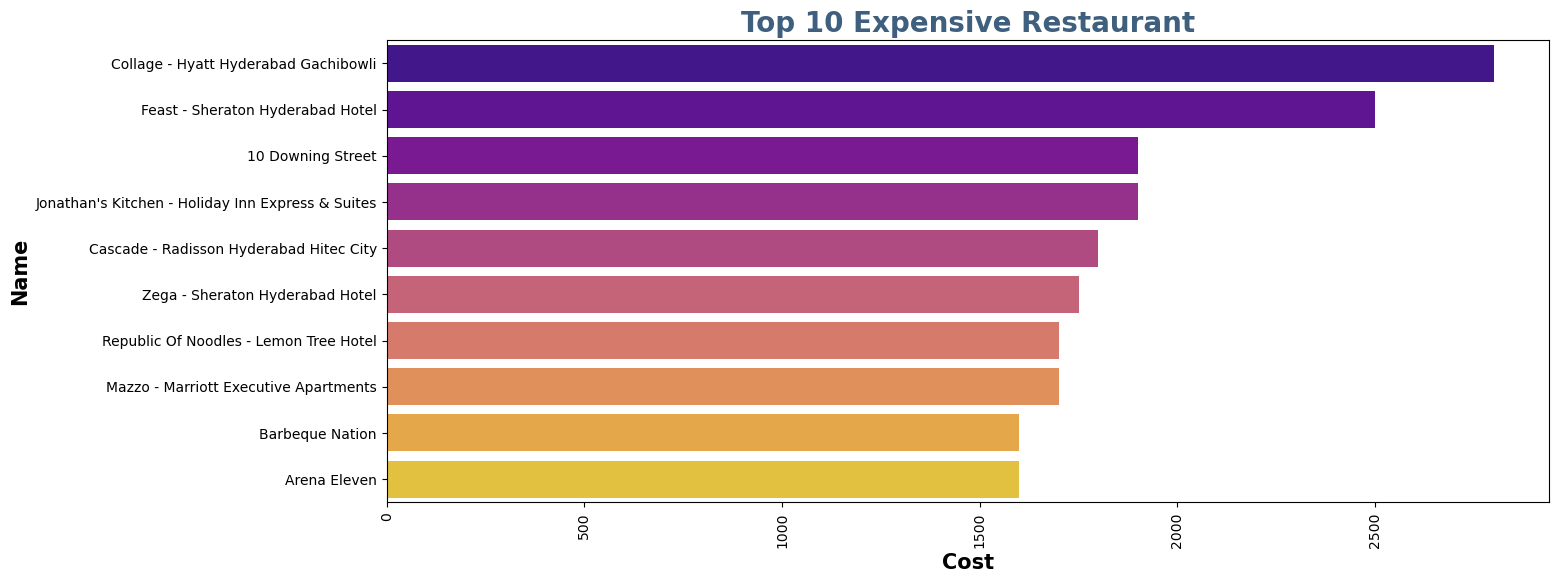

In [47]:
# Top 10 Expensive Restaurants
plt.figure(figsize=(15,6))
x = top_10_costly_rest['Cost']
y = top_10_costly_rest['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=20,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()
     

In [48]:
#Collage - Hyatt Hyderabad Gachibowli is the costliest restaurant followed by Feast - Sheraton Hyderabad Hotel and 10 Downing Street

In [49]:
#Finding the top 10 affordable restaurants
top_10_affor_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=True).head(10)
top_10_affor_rest
     

Name  Cost
61        Mohammedia Shawarma   150
7                        Amul   150
83               Sweet Basket   200
50                  KS Bakers   200
62              Momos Delight   200
43         Hunger Maggi Point   200
11             Asian Meal Box   200
100               Wich Please   250
79   Shah Ghouse Spl Shawarma   300
86                   Tempteys   350

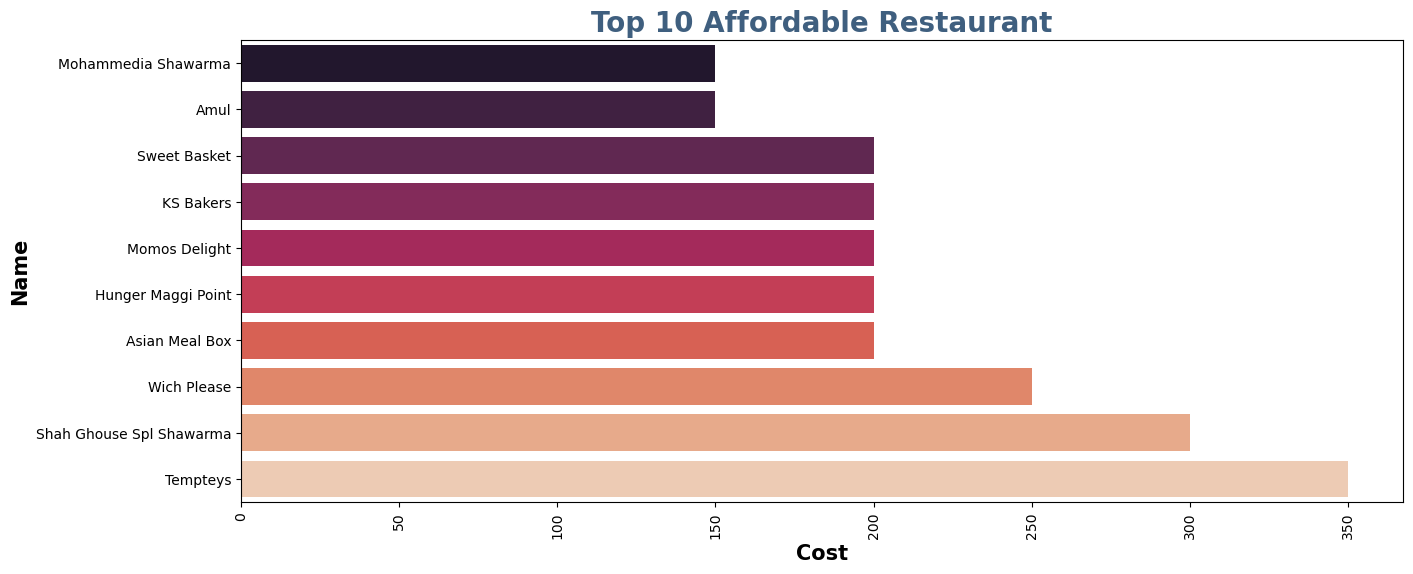

In [50]:
# Affordable price restaurants
plt.figure(figsize=(15,6))

x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rocket')
plt.show()

In [51]:
#"Mohammedia Shawarma" is the most affordable restaurant followed by "Amul" and "Sweet Basket"

In [52]:
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

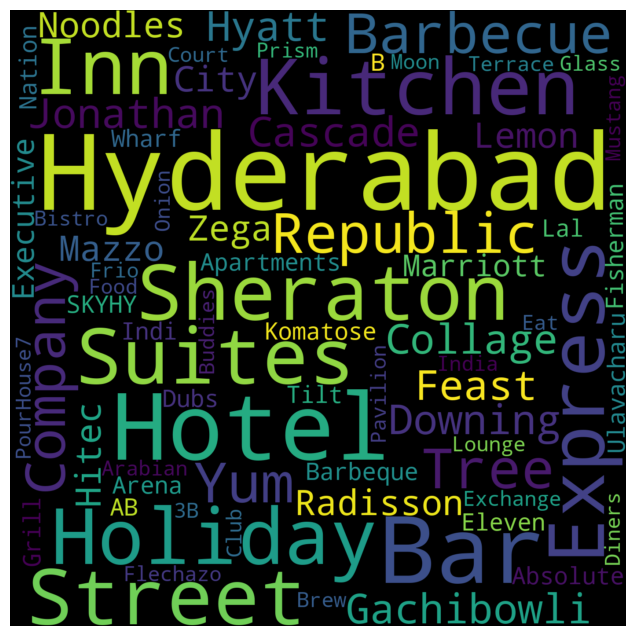

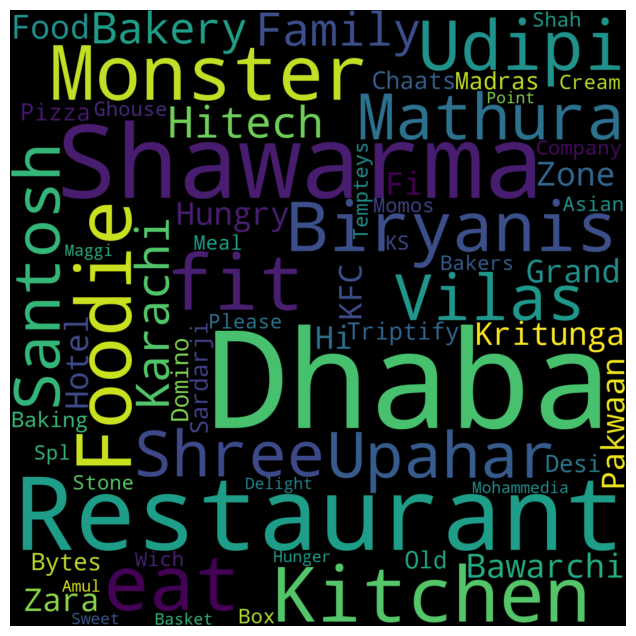

In [53]:
#Keywords for expensive retaurants : Hyderabad,Hotel,Barbecue,Bar,Suites etc.,
#Creating word cloud for affordable restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400, collocations = False, background_color = 'black').generate(text)

#Display the generated word Cloud

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [54]:
#Importing Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vashu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
     

In [56]:
#Function for removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)
     

In [57]:
# Removing stopwords from Cuisines
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [58]:
#Function for removing punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [59]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : remove_punctuation(x))
meta_df['Cuisines'].head()
     


0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [60]:
# Removing repeate characters
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [61]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [62]:
#Cleaning numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [63]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [64]:
#Count of each cusine 
from collections import Counter 
text = ' '.join(meta_df['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}
     

In [65]:
#Creating dataframe with Cusine frequency 
word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

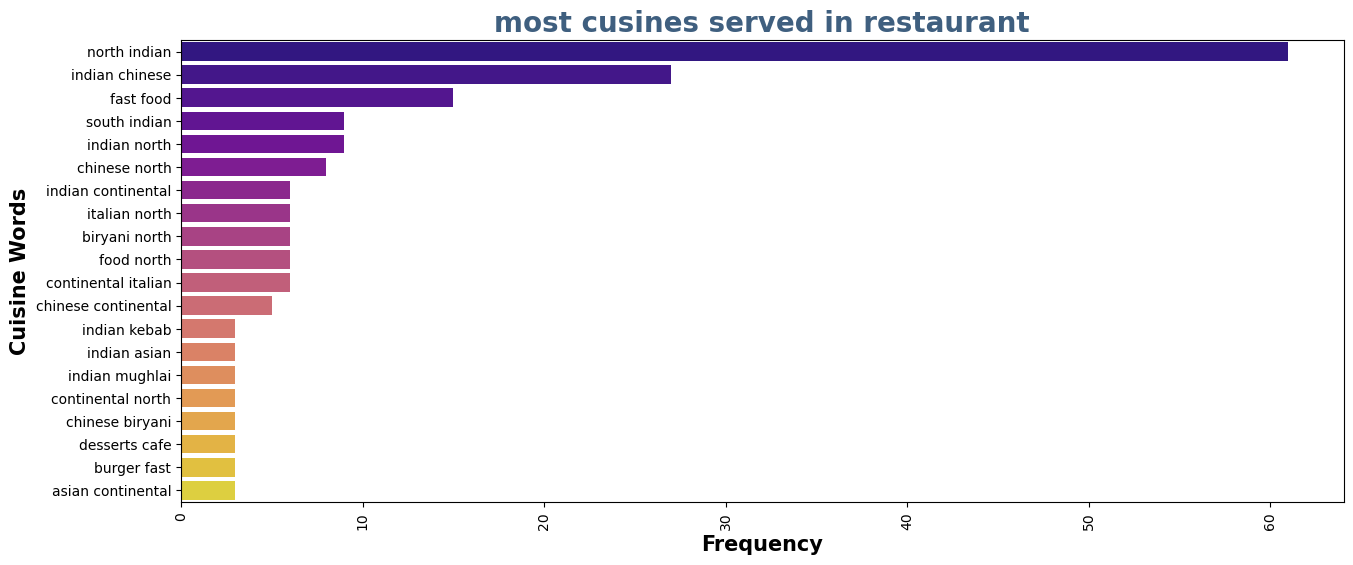

In [66]:
# most cusines served in restaurant
plt.figure(figsize=(15,6))
y = word_freq_20['Cuisine_Words']
x = word_freq_20['Frequency']
plt.title("most cusines served in restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Cuisine Words",weight='bold',fontsize=15)
plt.xlabel("Frequency",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette="plasma")
plt.show()

In [67]:
#Even though the restaurant list is from South India, the most served cuisine across the restaurants is "North Indian", then it is followed by "Indian Chinese" and "Fast Food"

In [68]:
#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1399.5, 1399.5, -0.5)

In [69]:
#Meta Data EDA Summary

#1."Collage - Hyatt Hyderabad Gachibowli" is the costliest restaurant followed by Feast - "Sheraton Hyderabad Hotel" and "10 Downing Street"
#2."Mohammedia Shawarma" is the most affordable restaurant followed by "Amul" and "Sweet Basket"
#3.Even though the restaurant list is from South India, the most served cuisine across the restaurants is "North Indian", then it is followed by "Indian Chinese" and "Fast Food"

In [70]:
#2. EDA on reviews dataset
# Countplot of Ratings
plt.figure(figsize=(7,5))
sns.countplot(review_df['Rating'],palette="plasma")
plt.title("Count of Ratings",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count",weight='bold',fontsize=15)
plt.xlabel("Ratings",weight='bold',fontsize=15)


Text(0.5, 0, 'Ratings')

In [71]:
#The most no of ratings provided by reviewers is 5 followed by 4 and then 1.

In [72]:
#Count of reviews wrt time
plt.figure(figsize=(12,6))
sns.histplot(review_df.Time)

<Axes: xlabel='Time', ylabel='Count'>

In [73]:
#Count of reviews wrt month
plt.figure(figsize=(12,6))
sns.countplot(review_df.Month)

<Axes: ylabel='count'>

In [74]:
#From the above chart we can see that tha reviews count increasing trend in the first half of the year and sudden drop in June and then from July there is a decreasing trend.

In [75]:
#Top Reviewers
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

Reviewer  Review_Count
654         Ankita            13
3855   Parijat Ray            13
2652         Kiran            12
7009  Vedant Killa            11
2311     Jay Mehta            11

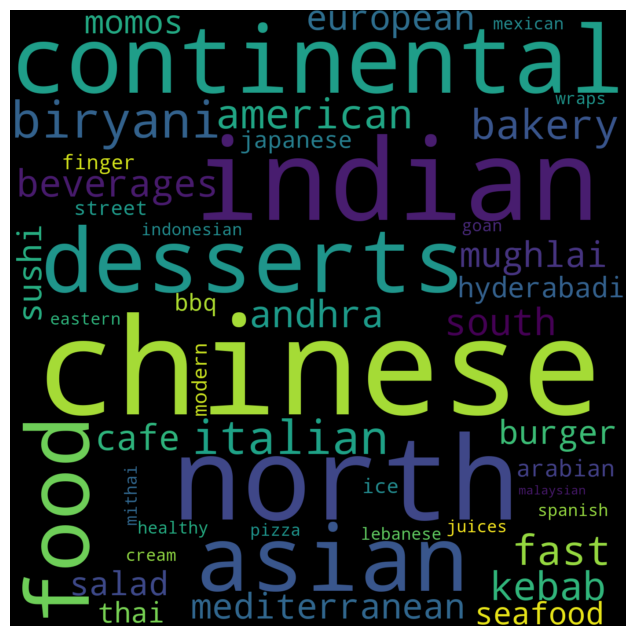

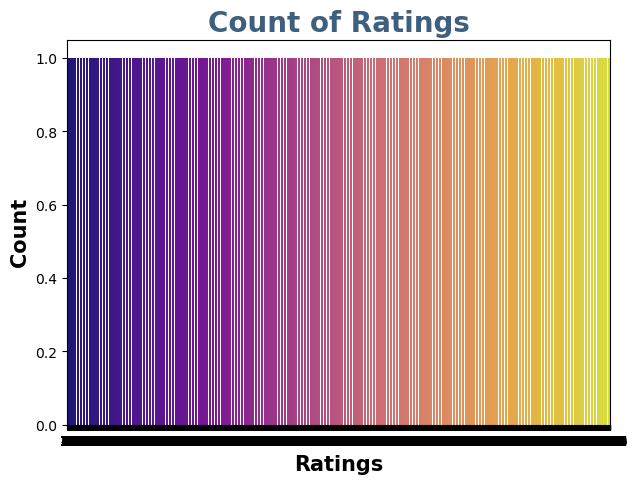

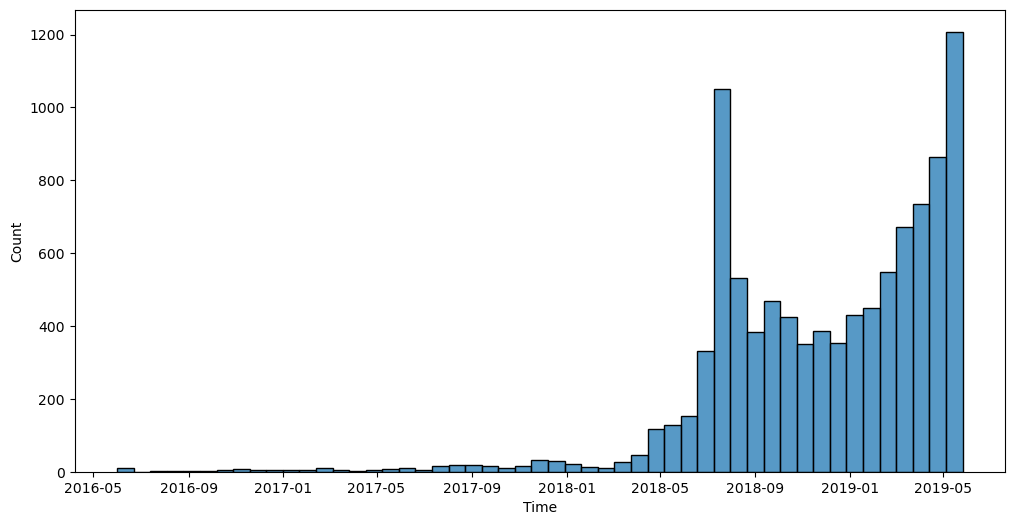

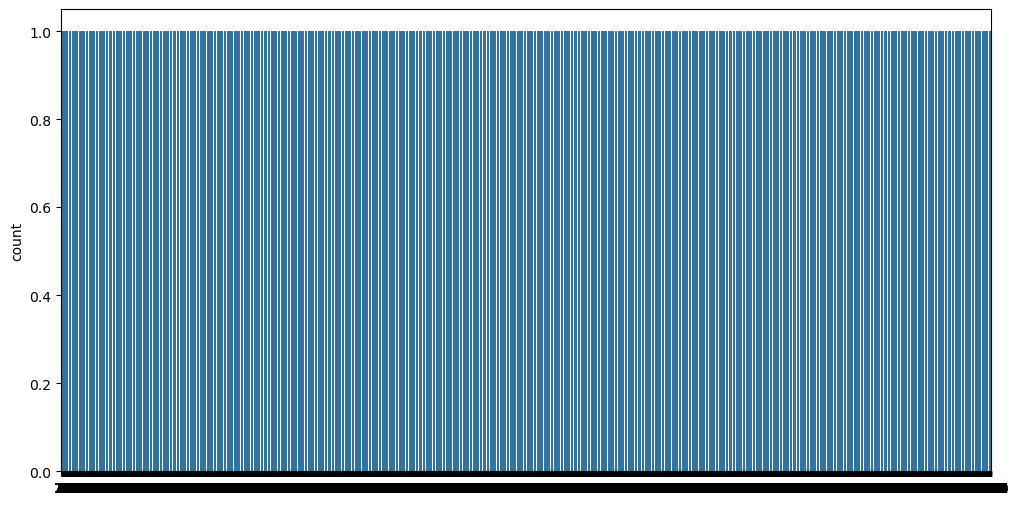

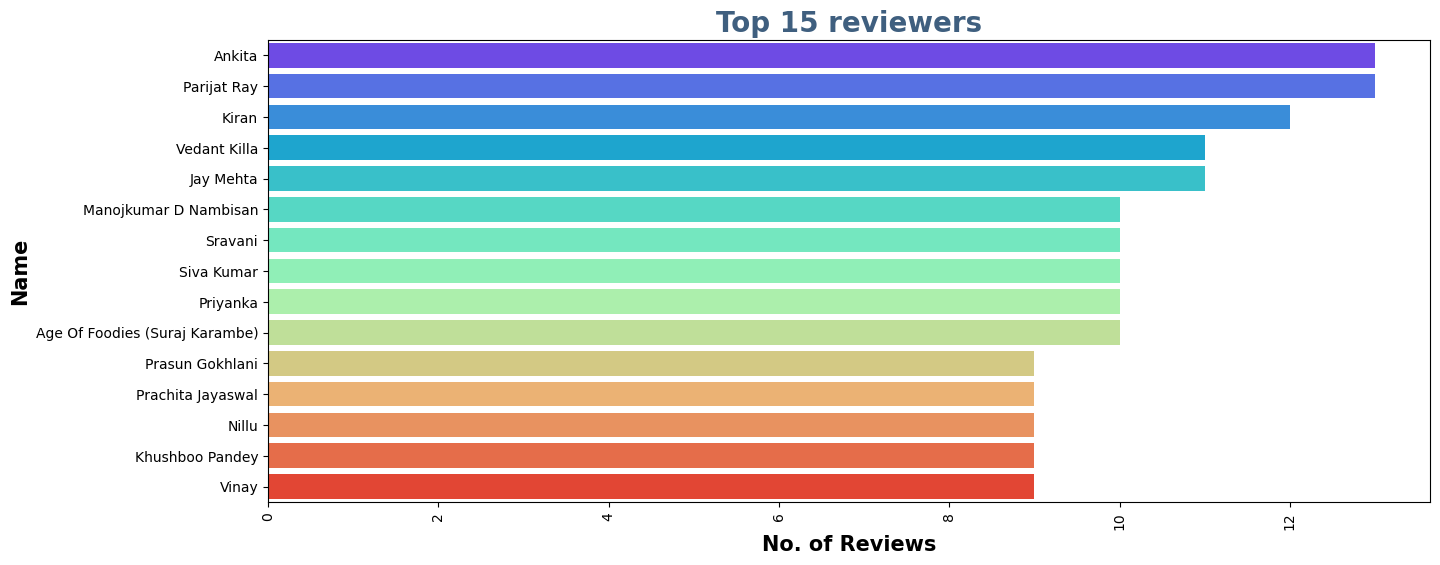

In [76]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

In [77]:
#The top 15 reviewers by review count is shown above.

#The top 2 reviewers have same no of reviews i.e., 13.

#The third reviewer has 12 reviews.

In [78]:
# Average of the ratings of reviewers with review count
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()
     

Reviewer  Review_Count  AverageRatings
2               Kiran            12        4.500000
11  Prachita Jayaswal             9        4.333333
3        Vedant Killa            11        4.000000
6             Sravani            10        4.000000
10    Prasun Gokhlani             9        4.000000

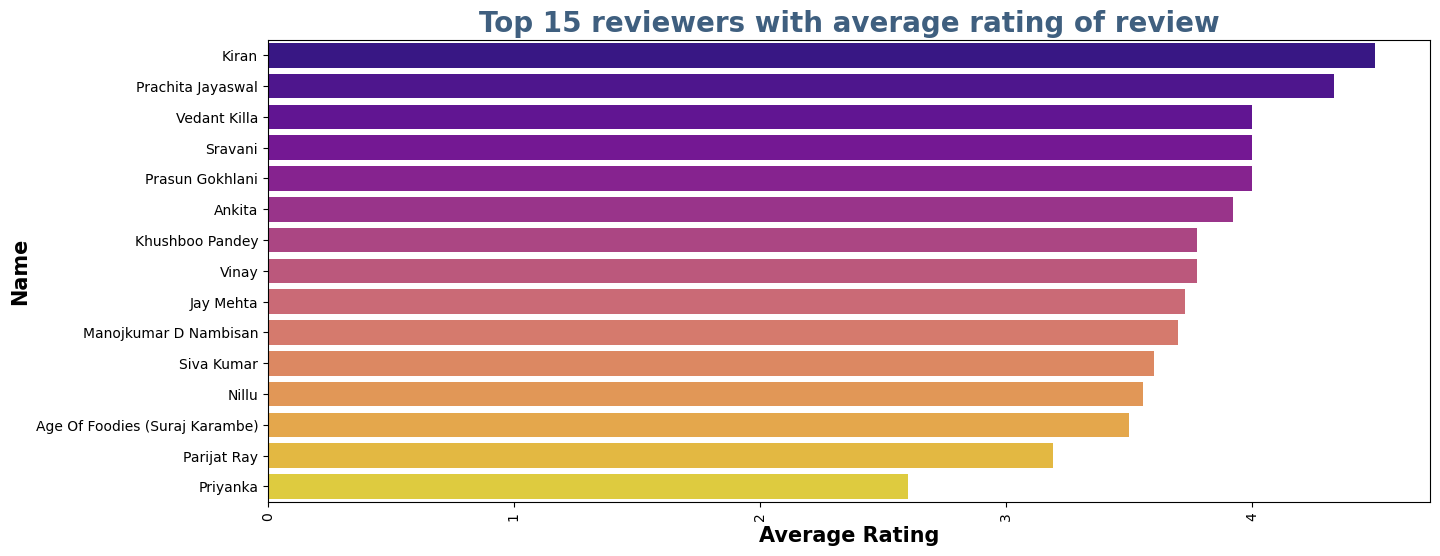

In [79]:
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

In [80]:
#The above chart shows the average rating of the top reviewers.

#->The highest review average is given by "Kiran" which is 4.5

#->The second highest rating average is given by "Prachita Jayaswal" which is 4.33

#->The third highest is shared by "Vedant Killa" and "Sravani" which is 4

In [82]:
# Review per hour
reviews_hour = review_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')
     

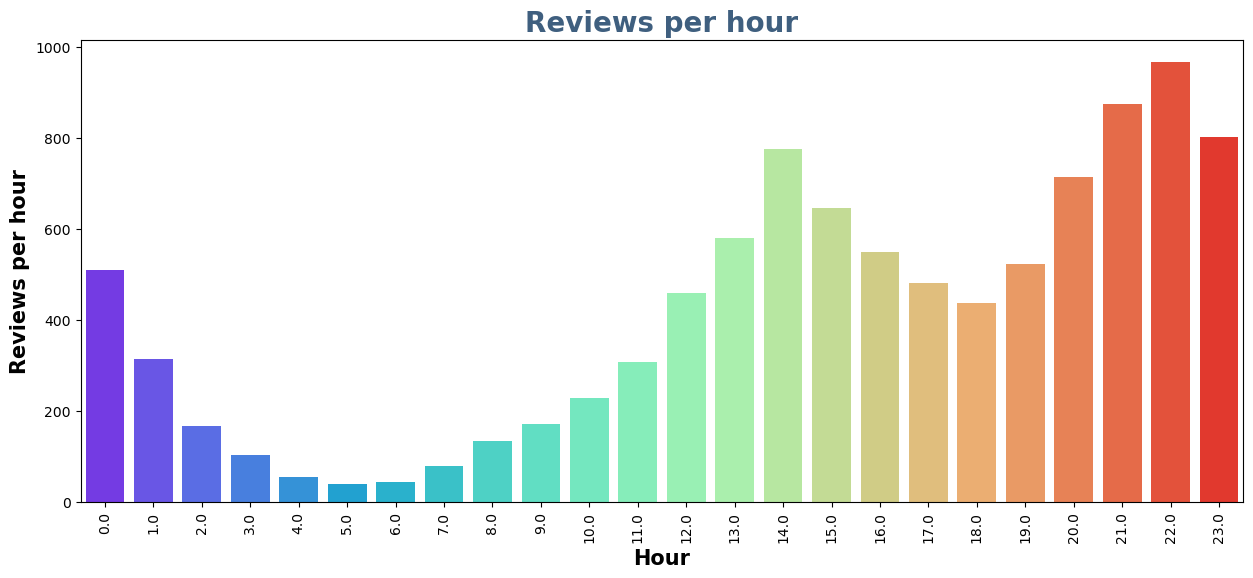

In [83]:
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()
     

In [84]:
#Reviews count with respect to hour of the day is plotted in the above chart

#->We can see an increasing trend in the reviews count in the morning from 7 AM till afternoon 2, which is generally lunch time.

#->Then there is s slight decrease in the reviews count till evening 6 PM

#->Then again there is an incrasing trend in the reviews count during the dinner time i.e., from 7 PM till midnight.

#->Most no if reviews have been received at 10 PM

In [85]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1399.5, 1399.5, -0.5)

In [86]:
#Summary of reviews data
#Summary :

#The most no of ratings provided by reviewers is 5 followed by 4 and then 1.
#There is a drastic increase in reviews count from mid 2018-2019 when compared to 2016-2017
#Review Count has increasing trend in 1st half of year and there is sudden drop in the month of june
#The highest review average is given by "Kiran" which is 4.5
#Count of reviews is directly corelated to lunch/dinner time

In [87]:
#6. Text Cleaning(Removing punctuation, Removing stopwords, Lemmatization)
#Stroing reviews in new dataframe
review= review_df.Review
review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [88]:
# removing punctuations
review_df['Review'] = review_df['Review'].apply(remove_punctuation)
     

In [89]:
# Removing Stopwords
review_df['Review'] = review_df['Review'].apply(stopwords)
     


In [90]:
review=review_df.Review
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9995    madhumathi mahajan well start nice courteous s...
9996    place never disappointed us food courteous sta...
9997    bad rating mainly chicken bone found veg food ...
9998    personally love prefer chinese food couple tim...
9999    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [91]:
#.3 Lemmatization
import spacy
nlp = spacy.load('en_core_web_sm')
     

In [92]:
# Function for lemmatization
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text
     

In [93]:

# Applying lematization
review=lemmatization_(review)

In [94]:
# function for removing extra spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
     

In [95]:
review=remove_spaces(review)
     

In [96]:
#.4 Removing Non Letters
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text
     


In [97]:
review=remove_non_leters(review)

In [98]:
# storing the reviews in a feature of df

review_df['Review'] = review[:len(review_df)]
print("Length of review list:", len(review))
print("Length of review_df:", len(review_df))
review_df.head()

Length of review list: 10000
Length of review_df: 9954


Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  ambience good food quite good saturday lunch c...     5.0   
1  ambience good pleasant evening service prompt ...     5.0   
2  must try great food great ambience thnx servic...     5.0   
3  soumen das arun great guy behavior sincerety g...     5.0   
4  food goodwe order kodi drumstick basket mutton...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  21.0

In [99]:
#.5 Removing most frequent and less frequent words-
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [100]:
#removing words greater than 45 and less than 2
review_df['Review']=review_df['Review'].apply(lambda x:len_less_than2(x))

In [101]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  ambience good food quite good saturday lunch c...     5.0   
1  ambience good pleasant evening service prompt ...     5.0   
2  must try great food great ambience thnx servic...     5.0   
3  soumen das arun great guy behavior sincerety g...     5.0   
4  food goodwe order kodi drumstick basket mutton...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  21.0

In [102]:
#Sentiment Analysis
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [103]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity
     

In [104]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [105]:
#Create two new columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)
     

In [106]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
     

In [107]:
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

In [108]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  ambience good food quite good saturday lunch c...     5.0   
1  ambience good pleasant evening service prompt ...     5.0   
2  must try great food great ambience thnx servic...     5.0   
3  soumen das arun great guy behavior sincerety g...     5.0   
4  food goodwe order kodi drumstick basket mutton...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month  Hour  \
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  15.0   
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  14.0   
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  22.0   
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  22.0   
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  21.0   

   Subjectivity  Polarity  Analysis  
0      0.720000  0.660000  Positive  
1      0.691667  0.708333  Positive  
2      0.675000  0.550000  Positive  
3      0.675000  0.750000  Positive  
4      0.566667  0.600000  Positive

In [109]:
review_df['Analysis'].shape

(9954,)

In [110]:
review_df['Analysis'].value_counts()

Analysis
Positive    7507
Negative    1858
Neutral      589
Name: count, dtype: int64

In [111]:
#Out Of total 9,954 reviews 7478 are positive, 1887 are Negative and 589 are Neutral

In [112]:
# plot the polarity and subjectivity
fig = px.scatter(review_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')
     

In [113]:
 #add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

#The x-axis shows polarity, and y-axis shows subjectivity. Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is

In [114]:
#Summary:

#Out of 9,954 Reviews

#Positive - 7,486 (75.20%)
#Negative - 1,877 (18.85&)
#Neutral - 591 (5.93%)


In [115]:
# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment 

In [116]:
# applying sentiment analysis
review_df['Analysis']=review_df['Analysis'].apply(lambda x:sentiment(x))
     

In [117]:
sentiment_df= review_df[['Review','Rating','Analysis']]
sentiment_df.head()
     

Review  Rating  Analysis
0  ambience good food quite good saturday lunch c...     5.0         0
1  ambience good pleasant evening service prompt ...     5.0         0
2  must try great food great ambience thnx servic...     5.0         0
3  soumen das arun great guy behavior sincerety g...     5.0         0
4  food goodwe order kodi drumstick basket mutton...     5.0         0

In [118]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])
     

In [120]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [121]:
#----------------Applying ML models------------>

In [122]:
#----------------->MultinomialNB

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score
     

In [127]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()

In [128]:
#training the model
model.fit(X_train,y_train)
     

MultinomialNB()

In [129]:
#predicting the values of y from x via model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
     

In [130]:
def model_details(y_train, y_test, y_pred_train, y_pred_test):
  # Accuracy
  print('-'*50)
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  classification_rep= classification_report(y_pred_test, y_test)
  
  print("The classification report on the train data is :")
  print(classification_rep)
     

In [131]:
model_details(y_train, y_test, y_pred_train, y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8367046215673142
Test accuracy is: 0.8252310164724789
--------------------------------------------------
The confusion matrix on the test data is :
[[2024  435]
 [   0   30]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2459
           1       0.06      1.00      0.12        30

    accuracy                           0.83      2489
   macro avg       0.53      0.91      0.51      2489
weighted avg       0.99      0.83      0.89      2489



In [132]:
#---------------->Random Forest Classifier

In [133]:
#importing Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [134]:
rf= RandomForestClassifier()
     

In [135]:
# Cross Validation
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)
     

In [136]:
rfc.fit(X_train, y_train)
     

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [137]:
random_y_pred_train=rfc.predict(X_train)
random_y_pred_test=rfc.predict(X_test)

In [138]:
# Evaluation
model_details(y_train, y_test, random_y_pred_train, random_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8168787675820496
Test accuracy is: 0.8135797509039775
--------------------------------------------------
The confusion matrix on the test data is :
[[2024  464]
 [   0    1]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      2488
           1       0.00      1.00      0.00         1

    accuracy                           0.81      2489
   macro avg       0.50      0.91      0.45      2489
weighted avg       1.00      0.81      0.90      2489



In [139]:
#-------------->XGB Classifier

In [140]:
from xgboost import XGBClassifier

In [141]:
xgbc=XGBClassifier()

In [142]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)
     

In [143]:

xgbc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

In [144]:
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

In [145]:
# Evaluation
model_details(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.9962491627595446
Test accuracy is: 0.9433507432703897
--------------------------------------------------
The confusion matrix on the test data is :
[[1979   96]
 [  45  369]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2075
           1       0.79      0.89      0.84       414

    accuracy                           0.94      2489
   macro avg       0.89      0.92      0.90      2489
weighted avg       0.95      0.94      0.94      2489



In [146]:
#----------->(Support Vector Machine)

In [147]:
from sklearn import svm
svm_clf = svm.SVC(probability=True)

In [148]:
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [149]:
svm_y_train_pred = svm_clf.predict(X_train)  
svm_y_test_pred = svm_clf.predict(X_test) 
     

In [150]:

# Evaluation
model_details(y_train, y_test, svm_y_train_pred, svm_y_test_pred)
     

--------------------------------------------------
Train accuracy is: 0.9963831212324179
Test accuracy is: 0.9280835676978706
--------------------------------------------------
The confusion matrix on the test data is :
[[1996  151]
 [  28  314]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2147
           1       0.68      0.92      0.78       342

    accuracy                           0.93      2489
   macro avg       0.83      0.92      0.87      2489
weighted avg       0.94      0.93      0.93      2489



In [151]:
Comparision_dict={'Model_Name':['MultinomialNB','Random Forest','XGB', 'Support Vector Machine'],
                  'Training_accuracy':[0.8397,0.8176,0.988,0.99],
                  'Test_accuracy':[0.8264,0.8123,0.9280,0.9212]} 
     

In [152]:
#RESULT
# Comparing Different models
Comparisione_df=pd.DataFrame(Comparision_dict)
Comparisione_df

Model_Name  Training_accuracy  Test_accuracy
0           MultinomialNB             0.8397         0.8264
1           Random Forest             0.8176         0.8123
2                     XGB             0.9880         0.9280
3  Support Vector Machine             0.9900         0.9212

In [153]:
#----------->(LDA of review)

In [154]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.decomposition import LatentDirichletAllocation
#import pyLDAvis
#import pyLDAvis.sklearn as sklearn_lda_vis
#pyLDAvis.enable_notebook()

In [155]:
# Importing the Libraries 

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

import pyLDAvis
import pyLDAvis.lda_model  # Works with most versions via the generic interface
from IPython.display import display


In [157]:

docs_raw = review_df['Review'].tolist()


In [158]:
#Transform text to vector form using the vectorizer object 
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{10,}\b', # num chars > 3 to avoid some meaningless words
                                max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                min_df = 10) 
     

In [159]:
#apply transformation
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
     

In [160]:
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw) 

In [161]:
print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], review_df['Review'], dtm_tfidf.shape[1]))
     

The shape of the tfidf is (9954, 140), meaning that there are 9954 0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe order kodi drumstick basket mutton...
                              ...                        
9995    evening radisson one kind food unlimited bliss...
9996    food good staff professional parking floor wor...
9997    sunday brunch fan large buffet strange get eve...
9998    day enjoy buffet breakfast cascade saturday mo...
9999    cascade spacious coffeeshop extensive menu try...
Name: Review, Length: 9954, dtype: object and 140 tokens made through the filtering process.


In [162]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                  'learning_decay': [.5, .7, .9]}
     

In [163]:
# Init the Model LDA(Algorithm)
lda = LatentDirichletAllocation()

In [164]:

model = GridSearchCV(lda, param_grid=search_params)

In [165]:

model.fit(dtm_tfidf)
     

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25, 30]})

In [166]:
best_lda_model = model.best_estimator_

In [273]:
# Topic Modelling Visualization for the Negative Reviews
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tfidf, tfidf_vectorizer)

AttributeError: module 'pyLDAvis' has no attribute 'sklearn'

In [ ]:
#----------------------->Clustering

In [175]:
# converting the cuisines to lower case
meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x : x.lower())

In [176]:

cuisine_df=meta_df_main.loc[:,['Name','Cost','Cuisines']]

In [177]:
cuisine_df.head()

Name   Cost  \
0                 Beyond Flavours    800   
1                        Paradise    800   
2                        Flechazo  1,300   
3  Shah Ghouse Hotel & Restaurant    800   
4      Over The Moon Brew Company  1,200   

                                            Cuisines  
0  chinese, continental, kebab, european, south i...  
1                     biryani, north indian, chinese  
2       asian, mediterranean, north indian, desserts  
3  biryani, north indian, chinese, seafood, bever...  
4  asian, continental, north indian, chinese, med...

In [178]:
# splitting the cuisine 
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [179]:
cuisine_df.head()

Name   Cost  \
0                 Beyond Flavours    800   
1                        Paradise    800   
2                        Flechazo  1,300   
3  Shah Ghouse Hotel & Restaurant    800   
4      Over The Moon Brew Company  1,200   

                                            Cuisines  
0  [chinese, continental, kebab, european, southi...  
1                    [biryani, northindian, chinese]  
2      [asian, mediterranean, northindian, desserts]  
3  [biryani, northindian, chinese, seafood, bever...  
4  [asian, continental, northindian, chinese, med...

In [180]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

In [181]:
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))
     

In [182]:
cuisine_df.head()

Name   Cost  american  andhra  arabian  asian  \
0                 Beyond Flavours    800         0       0        0      0   
1                        Paradise    800         0       0        0      0   
2                        Flechazo  1,300         0       0        0      1   
3  Shah Ghouse Hotel & Restaurant    800         0       0        0      0   
4      Over The Moon Brew Company  1,200         0       0        0      1   

   bakery  bbq  beverages  biryani  ...  northindian  pizza  salad  seafood  \
0       0    0          0        0  ...            1      0      0        0   
1       0    0          0        1  ...            1      0      0        0   
2       0    0          0        0  ...            1      0      0        0   
3       0    0          1        1  ...            1      0      0        1   
4       0    0          0        0  ...            1      0      0        0   

   southindian  spanish  streetfood  sushi  thai  wraps  
0            1        0           0      0     0      0  
1            0        0           0      0     0      0  
2            0        0           0      0     0      0  
3            0        0           0      0     0      0  
4            0        0           0      0     0      0  

[5 rows x 46 columns]

In [183]:
#Merging the two dataframes SO that we can add the average ratings of the restaurants also

In [184]:
review_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [185]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)
     

In [186]:
#There was on rating 'Like' so we can change it into 4, because 4 is not in Rating column

In [187]:
review_df['Rating'] = review_df['Rating'].replace('Like', '4')

In [188]:
# Change data type of rating column to float
review_df['Rating']= review_df['Rating'].astype('float')
     

In [189]:
review_df.dropna(subset =['Review'], inplace=True)

In [190]:
#Creating a new df to get the average ratings for each Restaurant

In [191]:

# Average ratings of the each restaurant
ratings_df  = review_df.groupby('Restaurant')['Rating'].mean().reset_index()
     

In [192]:
ratings_df .sort_values(by='Rating',ascending = False).head(15)

Restaurant  Rating
3                 AB's - Absolute Barbecues   4.880
11                                   B-Dubs   4.810
2            3B's - Buddies, Bar & Barbecue   4.760
67                                 Paradise   4.700
35                                 Flechazo   4.660
87                           The Indi Grill   4.600
97          Zega - Sheraton Hyderabad Hotel   4.450
64               Over The Moon Brew Company   4.340
16                          Beyond Flavours   4.280
19  Cascade - Radisson Hyderabad Hitec City   4.260
84                    The Fisherman's Wharf   4.220
34         Feast - Sheraton Hyderabad Hotel   4.220
71                     Prism Club & Kitchen   4.215
58    Mazzo - Marriott Executive Apartments   4.190
13                          Barbeque Nation   4.120

In [193]:
# Merging two data sets
# Example: Load both datasets before merging
cuisine_df = pd.read_csv('Restaurant names and Metadata.csv', encoding='unicode_escape')
ratings_df = pd.read_csv('Restaurant reviews.csv', encoding='unicode_escape')
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [194]:
df_cluster.head()
     

Name                                              Links Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings       Restaurant  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   

               Reviewer                                             Review  \
0     Rusha Chakraborty  The ambience was good, food was quite good . h...   
1  Anusha Tirumalaneedi  Ambience is too good for a pleasant evening. S...   
2       Ashok Shekhawat  A must try.. great food great ambience. Thnx f...   
3        Swapnil Sarkar  Soumen das and Arun was a great guy. Only beca...   
4                Dileep  Food is good.we ordered Kodi drumsticks and ba...   

  Rating                 Metadata             Time  Pictures  
0      5   1 Review , 2 Followers  5/25/2019 15:54         0  
1      5  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2      5  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3      5    1 Review , 1 Follower  5/24/2019 22:11         0  
4      5  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [195]:
# Split multi-cuisine values into separate binary columns
cuisine_dummies = df_cluster['Cuisines'].str.get_dummies(sep=', ')


In [196]:
df_cluster = pd.concat([df_cluster, cuisine_dummies], axis=1)


In [197]:
columns_needed = ['Name', 'Cost', 'Rating'] + list(cuisine_dummies.columns)
df_cluster = df_cluster[columns_needed]


In [198]:
print(df_cluster.columns.tolist())


['Name', 'Cost', 'Rating', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']


In [199]:
# Changing name and order of columns
df_cluster = df_cluster[['Name', 'Cost', 'Rating', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']]

In [200]:
print(df_cluster.columns.tolist())


['Name', 'Cost', 'Rating', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']


In [201]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           10000 non-null  object
 1   Cost           10000 non-null  object
 2   Rating         9962 non-null   object
 3   American       10000 non-null  int64 
 4   Andhra         10000 non-null  int64 
 5   Arabian        10000 non-null  int64 
 6   Asian          10000 non-null  int64 
 7   BBQ            10000 non-null  int64 
 8   Bakery         10000 non-null  int64 
 9   Beverages      10000 non-null  int64 
 10  Biryani        10000 non-null  int64 
 11  Burger         10000 non-null  int64 
 12  Cafe           10000 non-null  int64 
 13  Chinese        10000 non-null  int64 
 14  Continental    10000 non-null  int64 
 15  Desserts       10000 non-null  int64 
 16  European       10000 non-null  int64 
 17  Fast Food      10000 non-null  int64 
 18  Finger Food    10000 non-nu

In [202]:
# Converting cost column into numerical type
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')
     

In [203]:
df_cluster['Cost']= df_cluster['Cost'].astype('float')

In [204]:
# Convert Rating to numeric, force 'Like' and other invalid values to NaN
df_cluster['Rating'] = pd.to_numeric(df_cluster['Rating'], errors='coerce')

# Drop rows where Cost or Rating is NaN
df_cluster_clean = df_cluster.dropna(subset=['Cost', 'Rating'])

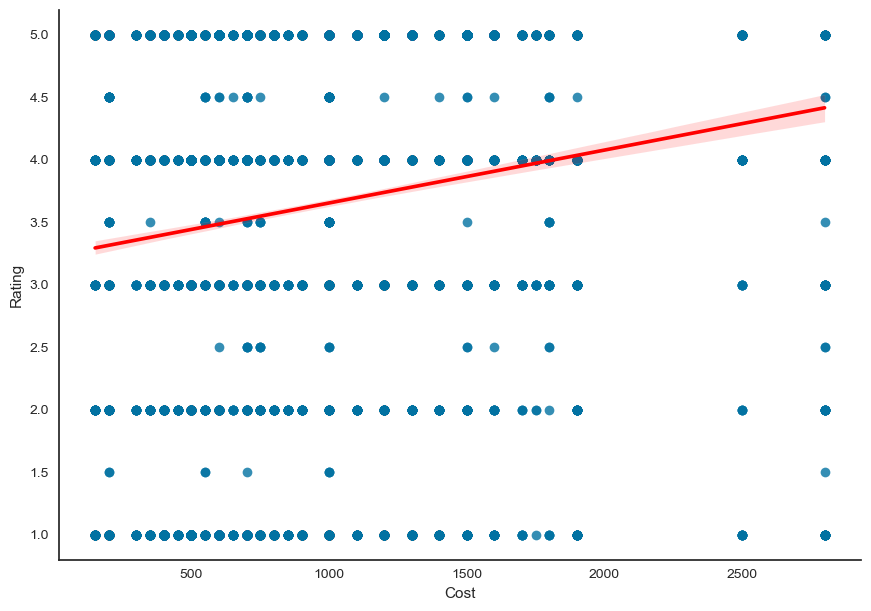

In [272]:
# Corelation Plot between Cost and rating
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)
plt.show()

     

In [206]:
print(df_cluster['Cost'].unique())
print(df_cluster['Rating'].unique())


[ 800. 1300. 1200. 1500.  500.  300. 1000.  350.  400. 1600.  750.  550.
 1900.  450.  150. 1400. 1100.  600.  200.  900.  700. 1700. 2500.  850.
  650. 1800. 2800. 1750.]
[5.  4.  1.  3.  2.  3.5 4.5 2.5 1.5 nan]


In [207]:
#------------>K-Means Clustering

In [208]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [209]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
     

In [210]:
df_cluster_clean = df_cluster.dropna()


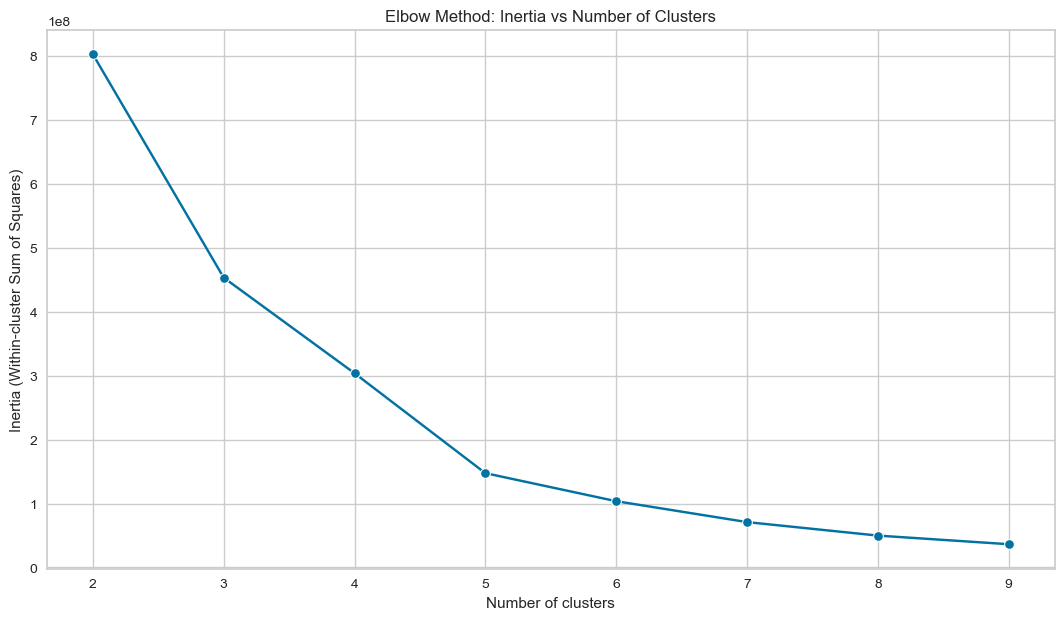

In [218]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use only numeric columns (excluding 'Name')
X = df_cluster_clean.drop('Name', axis=1)

# Elbow method: calculate inertia for cluster sizes 2 to 9
scores = [
    KMeans(n_clusters=k, random_state=11).fit(X).inertia_
    for k in range(2, 10)
]

# Plotting the Elbow Curve
plt.figure(figsize=(13, 7))
sns.lineplot(x=np.arange(2, 10), y=scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method: Inertia vs Number of Clusters")
plt.grid(True)
plt.show()


In [223]:
from sklearn.metrics import silhouette_score

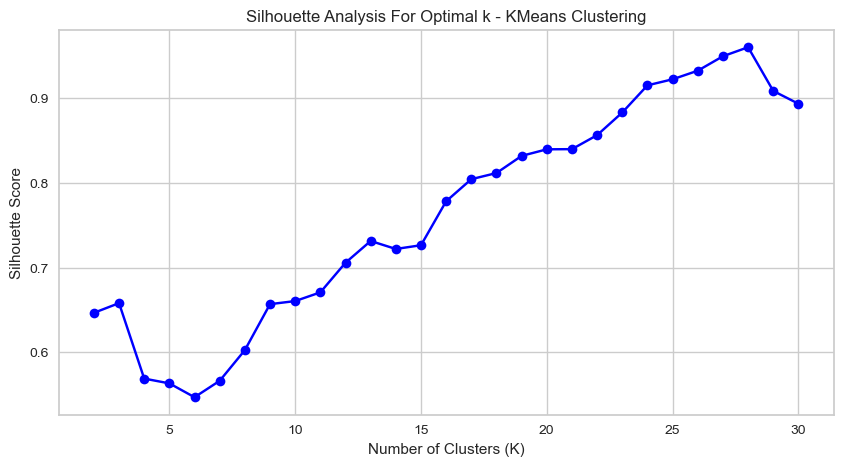

✅ Best number of clusters (k): 28


In [224]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Drop non-numeric column
X = df_cluster.drop('Name', axis=1)

# Step 2: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 3: Range of clusters
range_n_clusters = range(2, 31)
silhouette_avg = []

# Step 4: Loop with fixed fit and scoring
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=33)
    kmeans.fit(X_imputed)
    cluster_labels = kmeans.labels_
    
    #  Use imputed data here
    score = silhouette_score(X_imputed, cluster_labels)
    silhouette_avg.append(score)

# Step 5: Plot
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg, marker='o', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k - KMeans Clustering')
plt.grid(True)
plt.show()

# Step 6: Best K
best_k = range_n_clusters[np.argmax(silhouette_avg)]
print(" Best number of clusters (k):", best_k)


In [228]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [229]:
model = KMeans(random_state=11, n_clusters=5)
#model.fit(df_cluster.drop('Name',axis=1))
model.fit(X_imputed)  

KMeans(n_clusters=5, random_state=11)

In [231]:
#cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))
cluster_lbl = model.predict(X_imputed)


In [232]:
df_cluster['labels'] = cluster_lbl

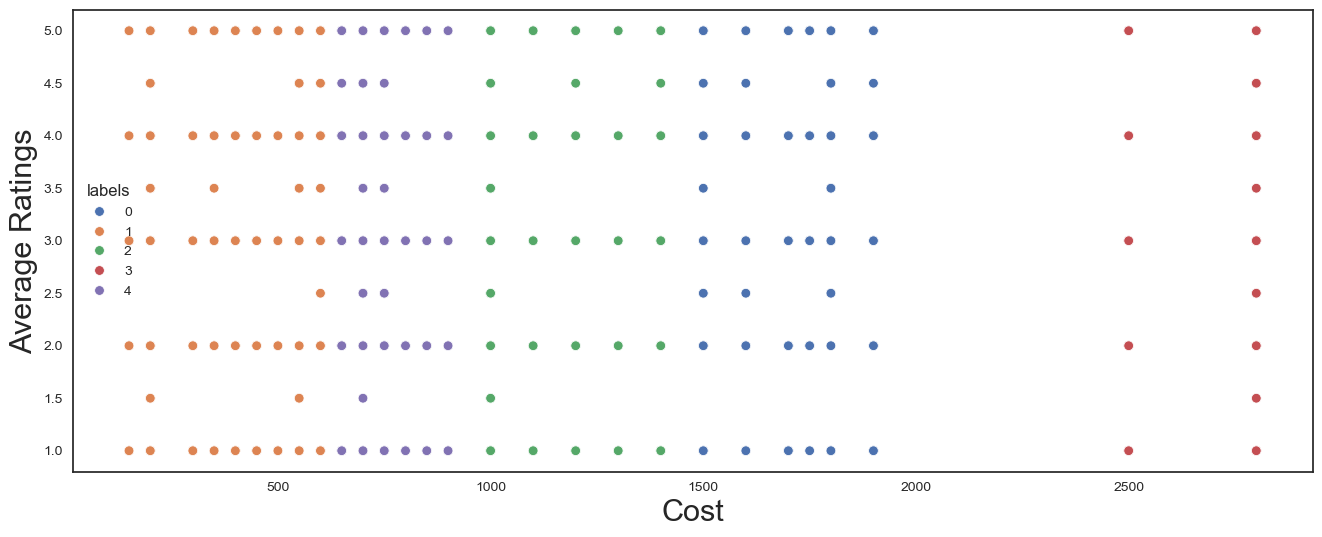

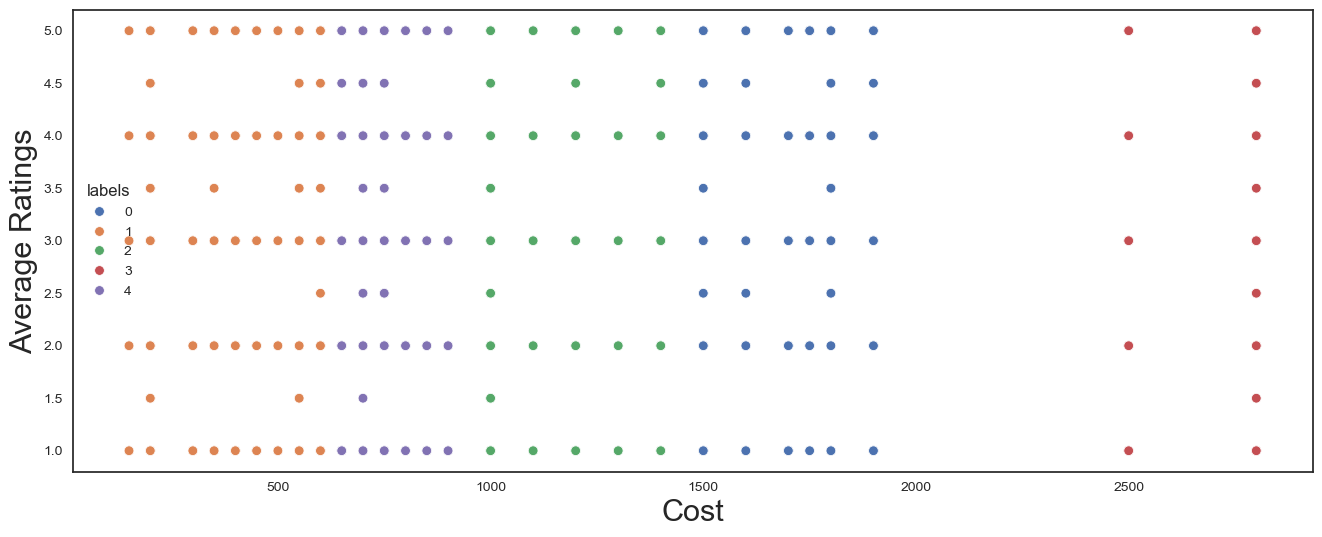

In [237]:
# Ploting the Clusters
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})
plt.show()     

In [238]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [239]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]
     

In [240]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')
     

Top cuisines in cluster 0
 North Indian    900
Asian           500
Continental     500
dtype: int64 

Top cuisines in cluster 1
 North Indian    1800
Chinese         1200
Fast Food       1200
dtype: int64 

Top cuisines in cluster 2
 North Indian    1600
Chinese         1100
Continental      800
dtype: int64 

Top cuisines in cluster 3
 Italian        200
Asian          200
Continental    200
dtype: int64 

Top cuisines in cluster 4
 North Indian    1600
Chinese         1500
Biryani          900
dtype: int64 



In [241]:
##Here we can see that NorthIndian and Chinese are the prominent cuisines across all clusters.

In [242]:
#-------------------->Clustering with Principal Component Analysis(PCA)

In [243]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('Name',axis =1))

In [244]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
     

In [246]:
X = df_cluster.drop('Name', axis=1)

# Fill NaN with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [248]:
X_pca = pca.fit_transform(X_imputed)
     

In [249]:
pca.components_

array([[ 9.99999629e-01,  4.21593052e-04, -1.11279502e-05,
        -5.20891364e-06, -3.52779572e-05,  3.15370782e-04,
         5.35088523e-05, -5.84809434e-05, -2.99902703e-05,
        -1.25485460e-04, -6.74779861e-05, -5.84809844e-05,
         2.16244188e-05,  3.60592928e-04, -1.55317756e-04,
         4.38804620e-05, -1.88859496e-04,  2.19401888e-05,
         2.47814059e-05, -1.46793954e-05, -1.72838491e-05,
        -4.90892083e-05, -2.84119134e-06,  3.64696794e-04,
         6.53470704e-05,  5.05096811e-06,  3.42520090e-05,
        -2.25715665e-05,  9.23383327e-05,  1.68892170e-05,
         8.90235553e-05, -3.10950998e-05,  4.65630856e-06,
        -1.27063728e-05,  2.16245270e-04, -1.86255031e-05,
         3.79612917e-05,  2.21769419e-05, -2.16244764e-05,
         1.29431506e-05, -4.71161837e-05,  1.08990711e-04,
         6.15586927e-06, -1.46794175e-05, -1.25170398e-04],
       [-4.28942383e-04,  9.72587216e-01,  1.15747322e-02,
        -1.63611493e-02, -3.11932490e-03,  6.59268925e-

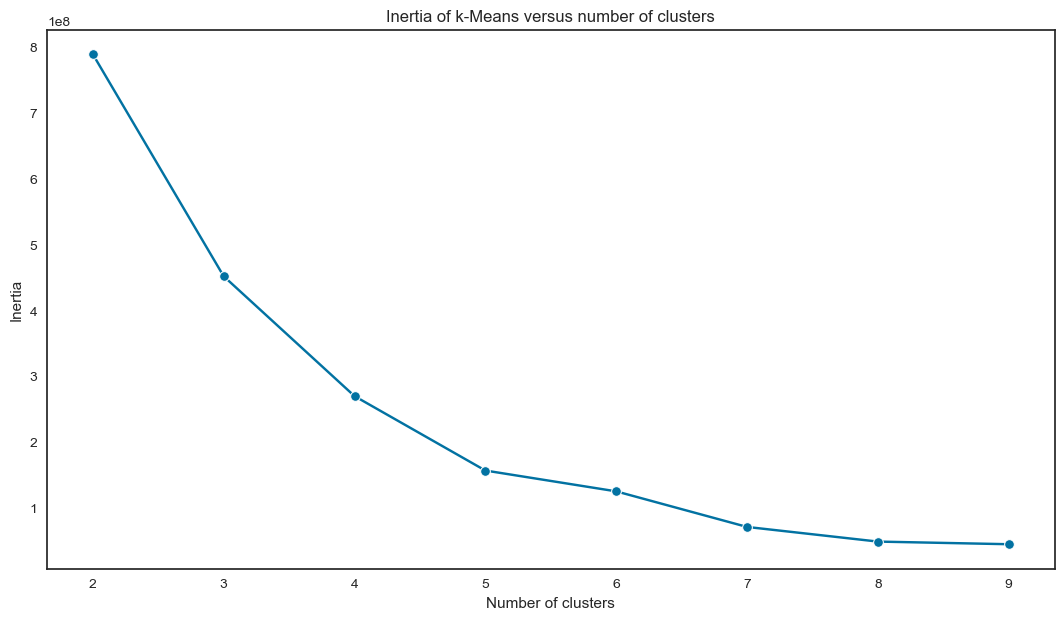

In [258]:
import matplotlib.pyplot as plt
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
#sns.lineplot(np.arange(2,10), scores1)
sns.lineplot(x=np.arange(2, 10), y=scores1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
plt.show()

In [259]:
##From this we can say that number of clusters can be 5

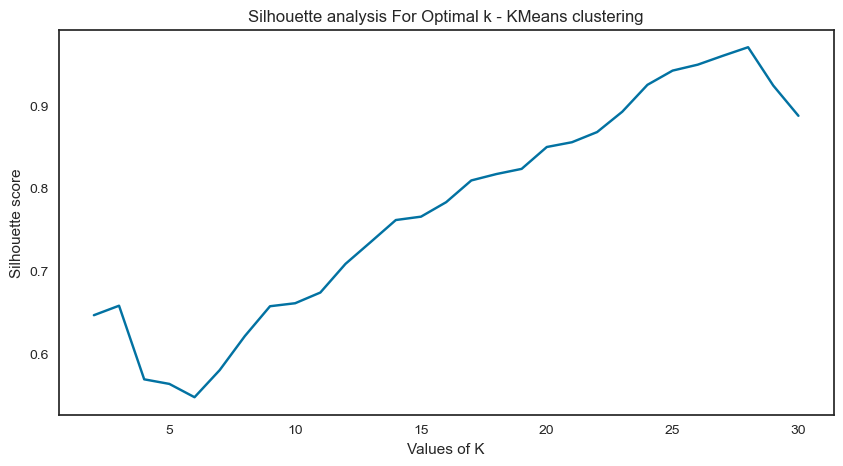

In [260]:
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(X_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()
     

In [261]:
# Clustering the data into 5 clusters
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=33)
kmeans.fit(X_pca)
     

KMeans(n_clusters=5, random_state=33)

In [262]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(170425651.0542401, 0.5635829123376143)


In [263]:
df_cluster['kmeans_cluster'] = kmeans.labels_

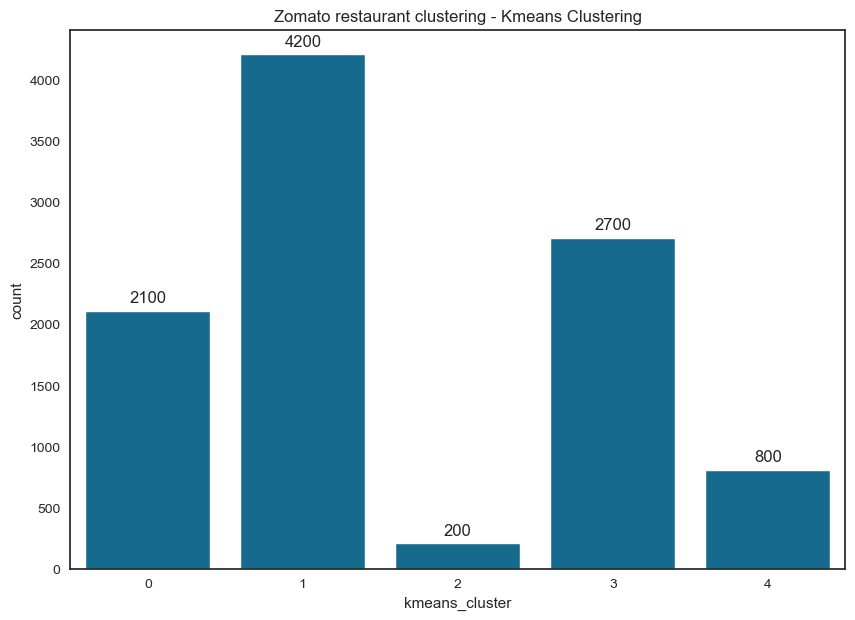

In [271]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,7))
q = sns.countplot(x='kmeans_cluster',data=df_cluster)
plt.title('Zomato restaurant clustering - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()
     

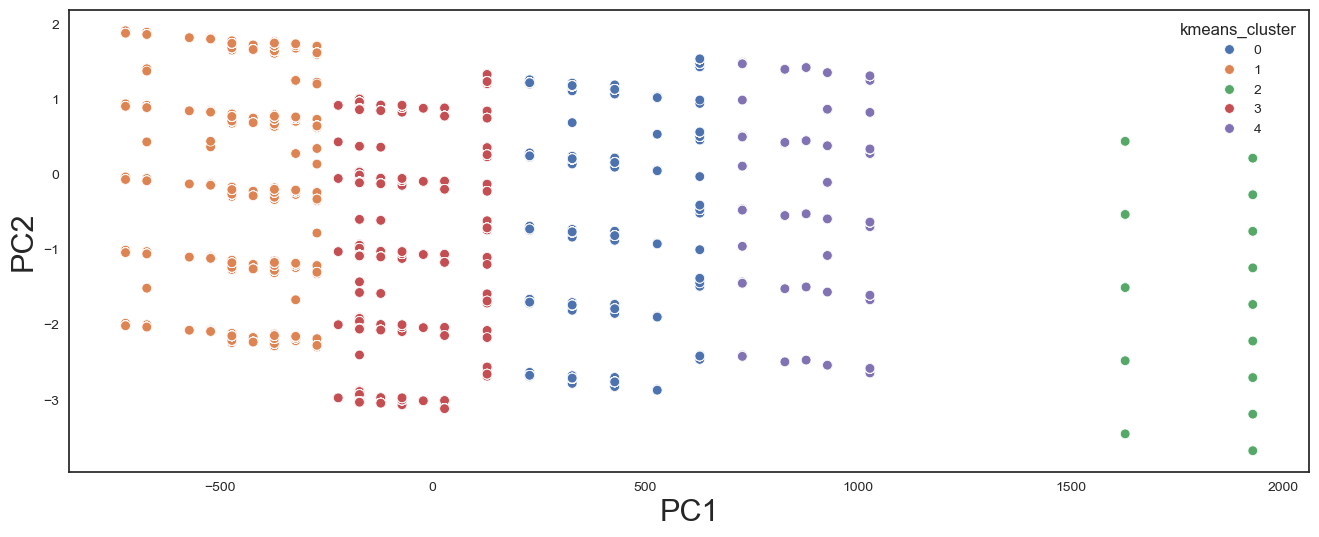

In [270]:
# Ploting different clusters with PCA
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='kmeans_cluster', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})
plt.show()

In [266]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()
     

In [267]:
list_of_df = [df_0,df_1,df_2,df_3,df_4]
     

In [268]:
# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')
     

Top Cuisines in Cluster 0 
 kmeans_cluster    3200
North Indian       900
Continental        500
dtype: int64 

Top Cuisines in Cluster 1 
 kmeans_cluster    4200
North Indian      1800
Fast Food         1200
dtype: int64 

Top Cuisines in Cluster 2 
 kmeans_cluster    1800
North Indian      1600
Chinese           1100
dtype: int64 

Top Cuisines in Cluster 3 
 kmeans_cluster    400
Asian             200
Continental       200
dtype: int64 

Top Cuisines in Cluster 4 
 kmeans_cluster    6300
North Indian      1600
Chinese           1500
dtype: int64 



# **Conclusions**

 *   The most popular cuisines which most of the restaurants are willing to provide
 *   The most popular cuisines in Hyderabad are North Indian, Chinese, Continental and Hyderabadi

 *   The cheapest food joint is Mohammedia Shawarma and the costliest restaurant in Hyatt hyderabad Gachibowli
 *   SVM and XGM both performed well, and we can choose any one them

 *   SVM and XGB are having 0.91 and 0.98 if testing accuracy respectively.
 *   We got best cluster size as 5 after performing PCA 
